In [16]:
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def handle_ordinal(X_train, X_test, y_train, kappa, ordinal_columns):
    missing_values = {}

    for col in ordinal_columns:
        unique_values_train = X_train[col].unique()
        unique_values_test = X_test[col].unique()

        y_train_np = y_train.to_numpy()
        X_train_col_np = X_train[col].to_numpy()
        print(X_train_col_np.shape)
        print(y_train_np.shape)
        for val in unique_values_test:
            X_test_col_val = val
            distances = np.abs(X_test_col_val - X_train_col_np)
            weights = 1 / ((1 + distances) ** kappa)
            l = np.sum(y_train_np * weights)
            v = np.sum(weights)
            imputed_value = l / v
            missing_values[(col, val)] = imputed_value

        for val in set(unique_values_train) - set(unique_values_test):
            X_train_col_val = val
            distances = np.abs(X_train_col_val - X_train_col_np)
            weights = 1 / ((1 + distances) ** kappa)
            l = np.sum(y_train_np * weights)
            v = np.sum(weights)
            imputed_value = l / v
            missing_values[(col, val)] = imputed_value

    for (col, val), imputed_value in missing_values.items():
        X_train.loc[X_train[col] == val, col] = imputed_value
        X_test.loc[X_test[col] == val, col] = imputed_value



    return X_train, X_test


def normalize(X1):
    result = X1.copy()
    for feature_name in X1.columns:
        max_value = X1[feature_name].max()
        min_value = X1[feature_name].min()
        result[feature_name] = X1[feature_name] / (max_value - min_value)
    return result

def transform_plot(X_train,X_test,y_train,k,cols):
    plt.figure(figsize=(12, 5))
    # Plot the train split
    plt.subplot(1, 2, 1)
    plt.hist(X_train['X'], bins=20, alpha=0.5, label='X', color='b')
    plt.hist(X_train['y'], bins=20, alpha=0.5, label='y', color='r')
    plt.title('Train Split Raw Data')
    plt.legend()
    
    
    X_train = normalize(X_train)
    X_train['y'] = y_train
    X_test = normalize(X_test)
    X_train_enc, X_test_enc = handle_ordinal(X_train,X_test,y_train,k,cols)
    X_train_enc.drop('y',inplace = True, axis = 1)
    X_test_enc.drop('y',inplace = True, axis = 1)

    # Plot the train and test splits
    

    # Plot the train split
    plt.subplot(1, 2, 2)
    plt.hist(X_train_enc, bins=20, alpha=0.5, label='X-enc', color='b')
    plt.hist(y_train, bins=20, alpha=0.5, label='y', color='r')
    plt.title('Train Split Encoded Data')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Set random seed for reproducibility
def create_data(set1=np.random.normal(5,3,100) ,set2=np.random.normal(20,3,100)):
    # Combine the two sets into a DataFrame
    data = pd.DataFrame({'X': set1, 'y': set2})

    # Create a train-test split
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
    plt.figure(figsize=(12, 5))
    return X_train, X_test

(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

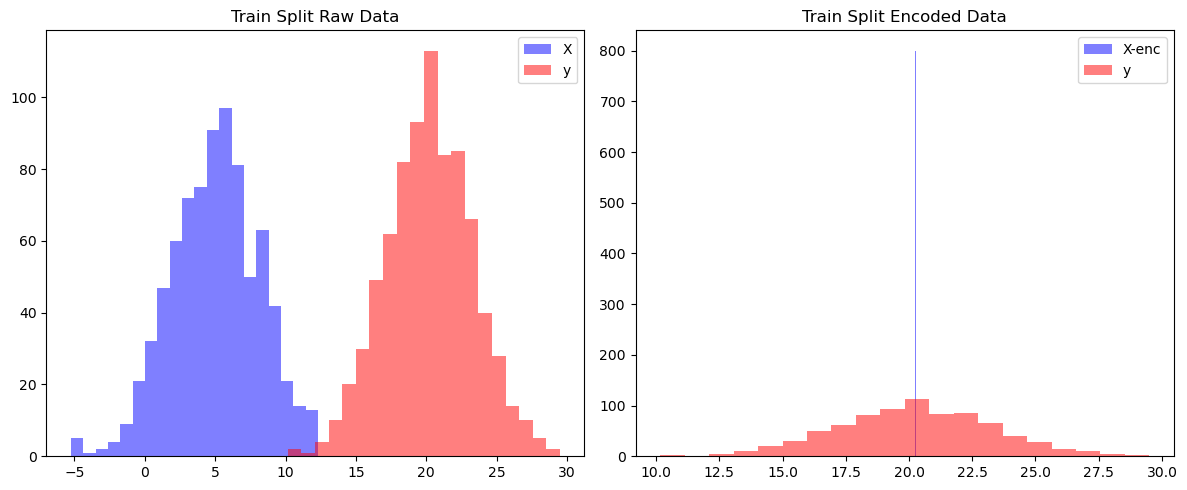

kappa = 0, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

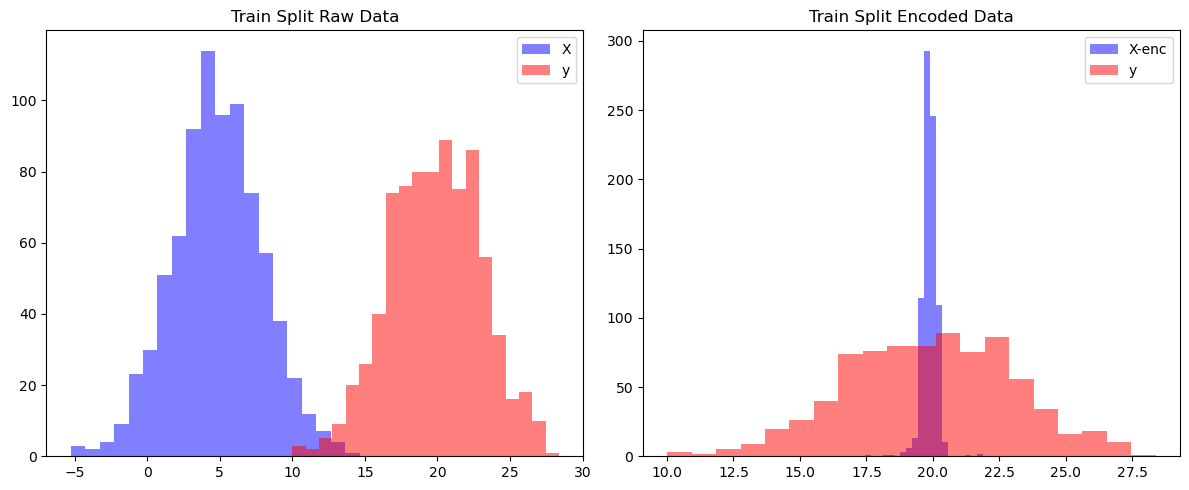

kappa = 50, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

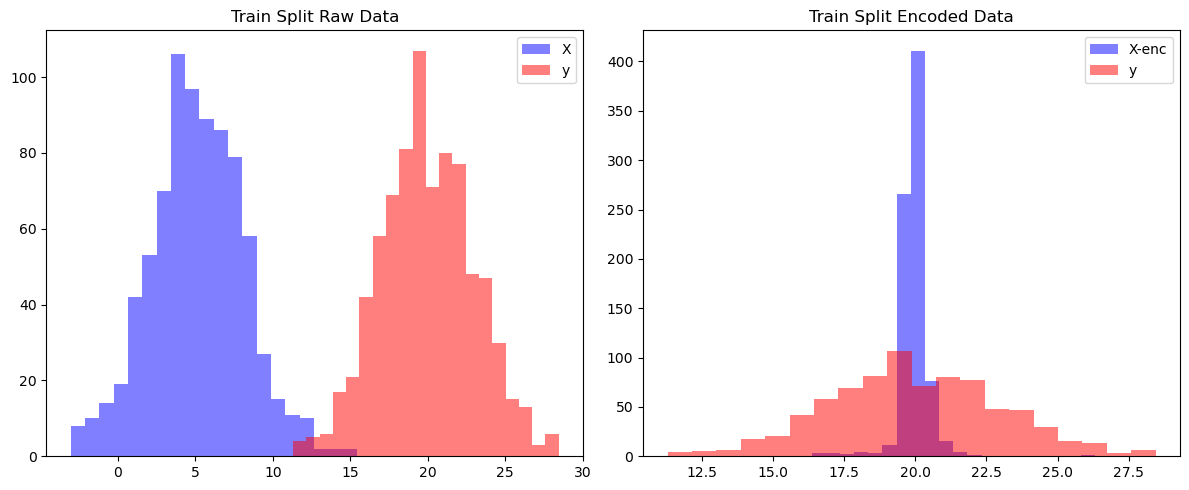

kappa = 100, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

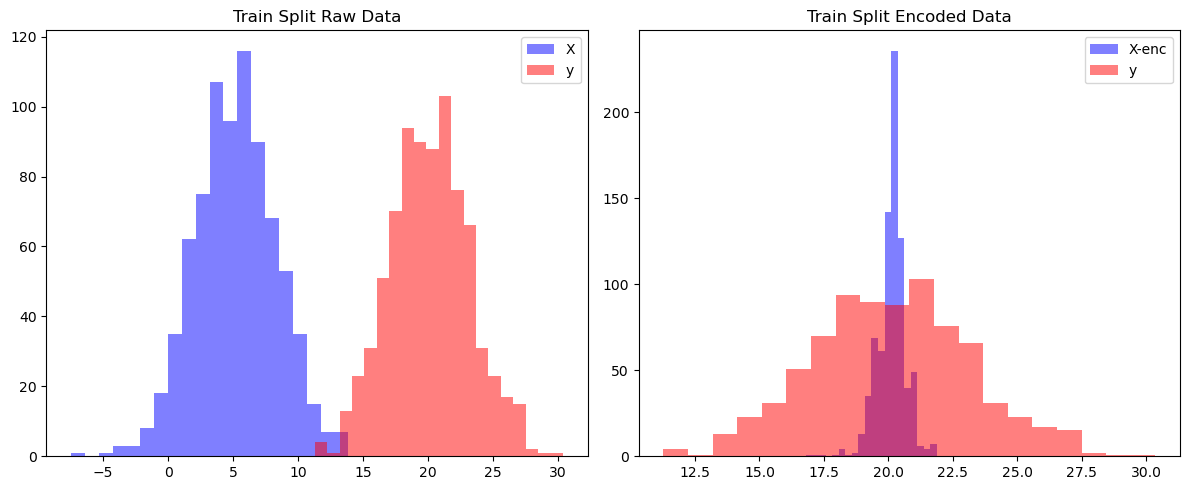

kappa = 150, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

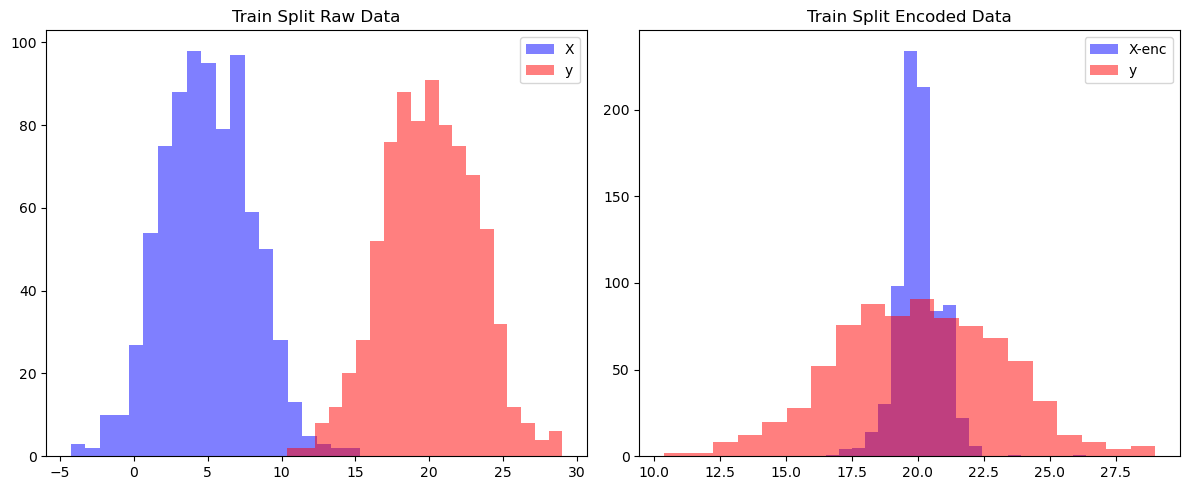

kappa = 200, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

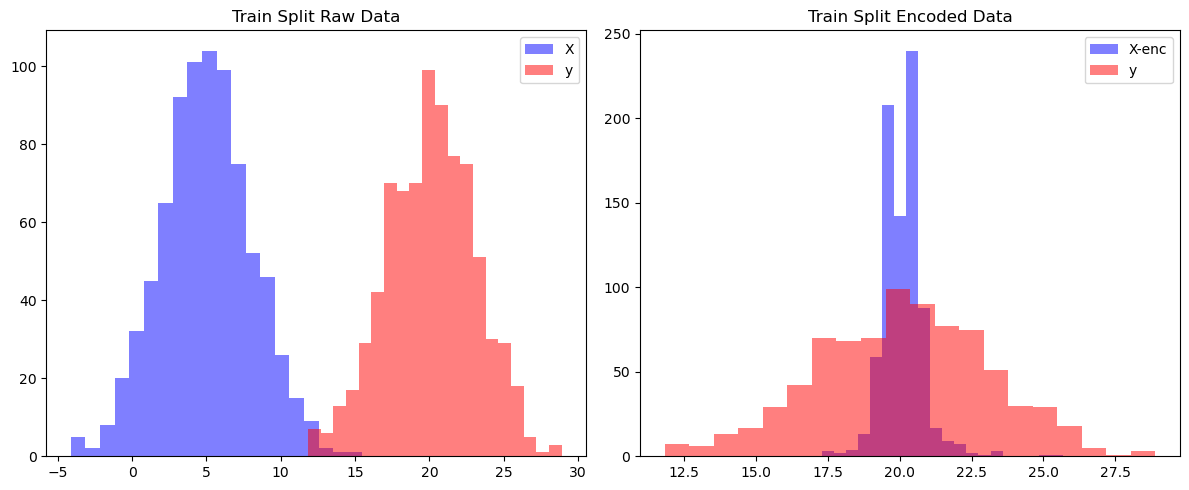

kappa = 250, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

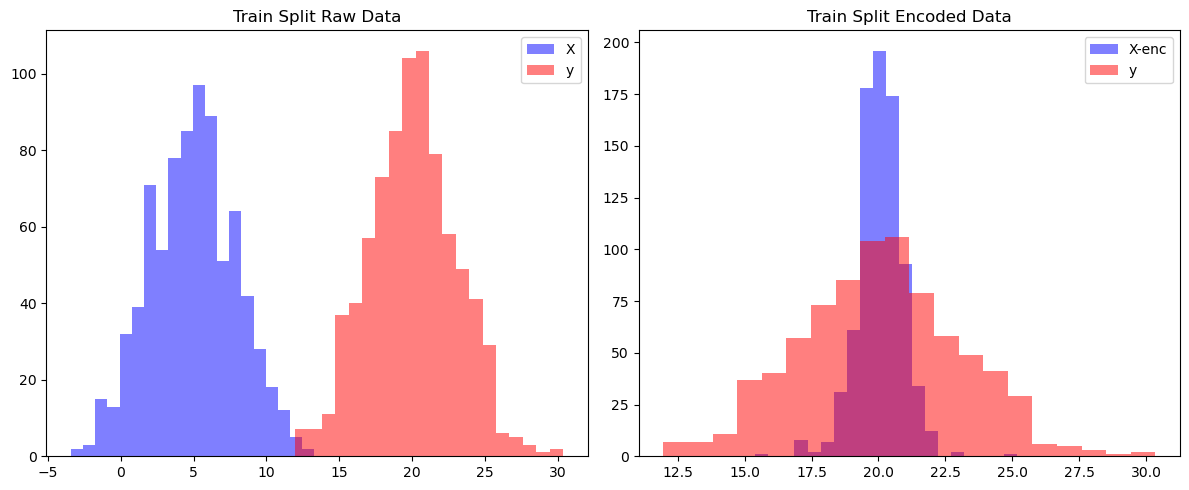

kappa = 300, N = 1000
(800,)
(800,)


<Figure size 1200x500 with 0 Axes>

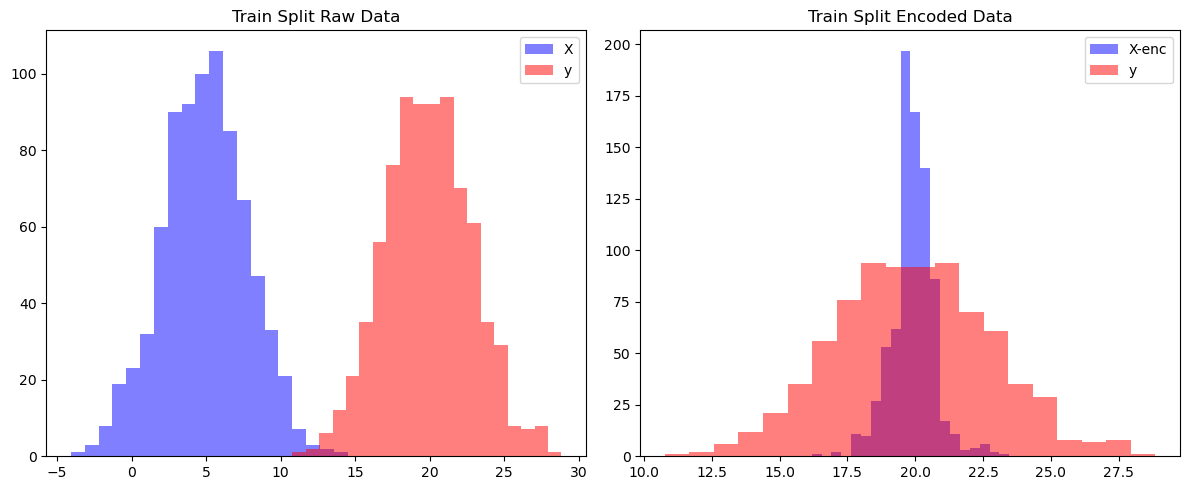

kappa = 350, N = 1000


In [17]:
import matplotlib.pyplot as plt

N = list(range(0,400,50))
# fig, axs = plt.subplots(len(N), 2)

for idx,k in enumerate(N):
    
    X_train, X_test = create_data(set1=np.random.normal(5,3,1000) ,set2=np.random.normal(20,3,1000) )
    transform_plot(X_train,X_test,X_train['y'],k,['X'])
    print(f"kappa = {k}, N = 1000")